<a href="https://colab.research.google.com/github/mlteixei/ppca/blob/main/aedi_prova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova AEDI - Matheus Rosa

## **Questão 1 – (4 pontos)**
O exercício 1 da Prova Final será baseado na aplicação prática de um problema de Ciência de Dados em Regressão Linear. Esses problemas são originados de dados reais aplicados em problemas de Negócios. A tarefa abordará a aplicação do problema de Venda de Casas em King County (USA). Esse problema consiste em encontrar um modelo capaz de prever e explicar o fenômeno de precificação de venda de imóveis na região de King County (USA). Com base nos dados fornecidos, solicita-se:

a) Elaborar uma análise descritiva da base de dados, incluindo análise gráfica e tabelas. (20%)

b) Gerar o modelo de Regressão Linear e apresentar os valores sumarizados do modelo. (30%)

c) Interpretar os resultados levando em consideração os pressupostos da regressão linear. (30%)

d) Corrigir os problemas relacionados aos pressupostos da regressão e gerar o modelo mais ajustado para os dados. (20%)

e) Interpretar os resultados e destacar as principais decisões que podem ser tomadas com base nos resultados encontrados. (10%)

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# baixando o dataset do Kaggle
# {"username":"matheusltr","key":"e4c5cddd081452edd92831397f77e91e"}
od.download("https://www.kaggle.com/datasets/harlfoxem/housesalesprediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: matheusltr
Your Kaggle Key: ··········


100%|██████████| 780k/780k [00:00<00:00, 63.9MB/s]

### **a) Elaborar uma análise descritiva da base de dados, incluindo análise gráfica e tabelas. (20%)**

A análise descritiva envolve a obtenção de estatísticas descritivas, como média, mediana, desvio padrão e quartis, para cada variável. Também é útil visualizar os dados por meio de gráficos, como histogramas, gráficos de dispersão ou box plots, para identificar padrões ou tendências.




In [ ]:
# visualiza as primeiras linhas do dataframe
df1 = pd.read_csv('/content/housesalesprediction/kc_house_data.csv')
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# obter estatísticas descritivas
print(df1.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [ ]:
# verifica valores nulos
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# verifica informações sobre as colunas e os tipos de dados
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# remove colunas que não irão contribuir para o modelo
df1 = df1.drop(["date"], axis = 1)

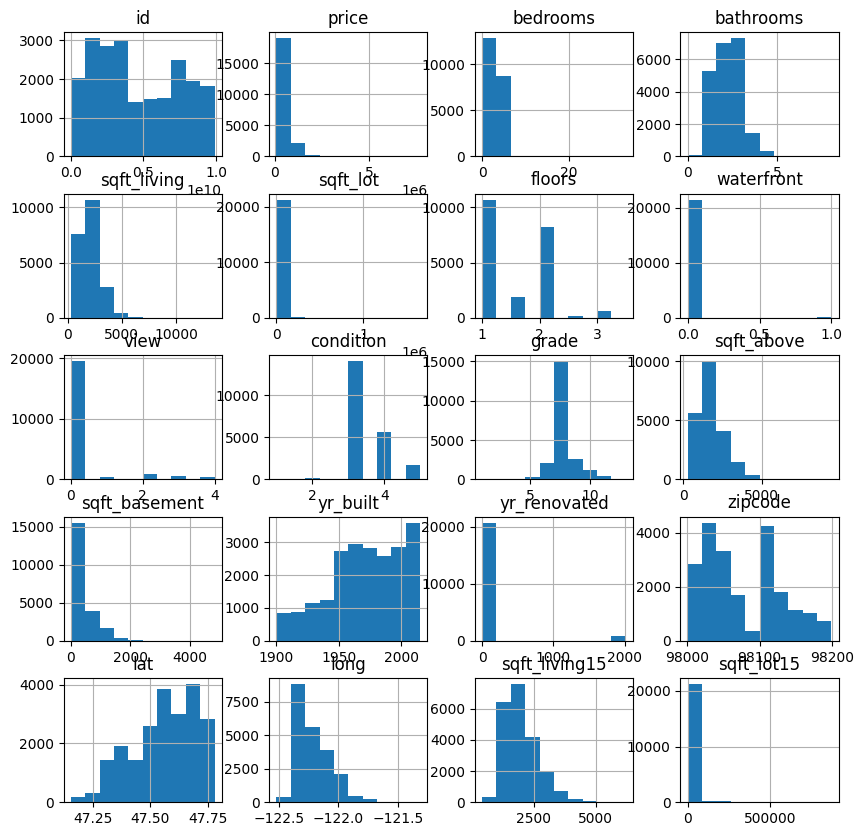

In [ ]:
# visualiza dados em histograma
df1.hist(figsize=(10, 10))
plt.show()

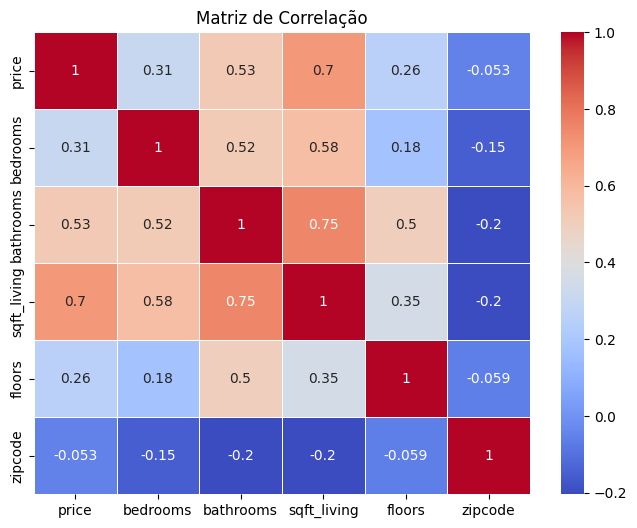

In [ ]:
# mostra matriz de correlação entre os atributos selecionados
atributos = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'zipcode']
data_subset = df1[atributos]

correlation_matrix = data_subset.corr()

# plota a matriz de correlação como uma figura
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

### **b) Gerar o modelo de Regressão Linear e apresentar os valores sumarizados do modelo. (30%)**

A regressão linear busca encontrar uma relação linear entre uma variável dependente (neste caso, o preço de venda) e uma ou mais variáveis independentes (as características das casas)

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# separa as variáveis independentes (features) e variável dependente (target)
X = df1.drop('price', axis=1)
y = df1['price']

In [ ]:
# divide os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# inicializa e ajusta o modelo de Regressão Linear
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# mostra os valores sumarizados do modelo
print('Coeficientes:', model1.coef_)
print('Intercepto:', model1.intercept_)

Coeficientes: [-1.33978221e-06 -3.43074736e+04  4.45861014e+04  1.08944477e+02
  8.05637972e-02  7.01981320e+03  5.61992102e+05  5.37898653e+04
  2.43817431e+04  9.47120482e+04  6.99457981e+01  3.89986788e+01
 -2.68205192e+03  2.02428706e+01 -5.51831873e+02  5.95402284e+05
 -1.92574700e+05  2.11354355e+01 -3.39559834e-01]
Intercepto: 6883865.792562229


> O coeficiente de regressão é uma medida da mudança esperada no valor da variável dependente (preço de venda) para cada unidade de mudança na variável independente, mantendo as outras variáveis constantes.

> O intercepto representa o valor esperado da variável dependente quando todas as variáveis independentes são iguais a zero. No contexto do problema, isso pode não ter um significado prático real, pois dificilmente uma casa terá zero quartos, banheiros e área da sala. No entanto, o intercepto pode ajudar a definir uma referência inicial para os preços de venda.

In [ ]:
# usa o pacote statsmodels para uma análise mais detalhada dos pressupostos
X_train = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2230.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:58:31   Log-Likelihood:            -2.3542e+05
No. Observations:               17290   AIC:                         4.709e+05
Df Residuals:                   17271   BIC:                         4.710e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.884e+06   3.24e+06      2.122

In [ ]:
# avaliação do modelo
X_test = sm.add_constant(X_test)
y_pred = model_sm.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²):', r2)

Mean Squared Error (MSE): 45164817781.00558
Root Mean Squared Error (RMSE): 212520.15852856307
R-squared (R²): 0.7012448735869559


O MSE é o erro médio quadrático, o RMSE é a raiz quadrada do MSE e o R² é o coeficiente de determinação, que indica a proporção da variância na variável dependente que é previsível a partir das variáveis independentes.

Essas métricas fornecem informações sobre a qualidade das previsões do modelo. Quanto menor o MSE e o RMSE, melhor, pois isso indica um menor erro médio nas previsões. Já o R² varia de 0 a 1, sendo 1 um ajuste perfeito do modelo aos dados.

### **c) Interpretar os resultados levando em consideração os pressupostos da regressão linear. (30%)**


Alguns dos pressupostos da regressão linear incluem:

Linearidade: O modelo presume uma relação linear entre as variáveis independentes e a variável dependente. Podemos verificar se essa suposição é razoável analisando os gráficos de dispersão e as relações entre as variáveis.

Homocedasticidade: O pressuposto de homocedasticidade implica que a variância dos erros é constante em todas as faixas dos valores previstos. Pode verificar isso plotando os resíduos em relação aos valores previstos e verificando se há algum padrão.

Independência dos erros: Os erros devem ser independentes uns dos outros. Isso significa que não deve haver autocorrelação entre os resíduos. Verifique se há autocorrelação residual usando gráficos de autocorrelação ou testes estatísticos adequados.

Normalidade dos resíduos: O pressuposto de normalidade dos resíduos assume que os resíduos seguem uma distribuição normal. Podemos verificar isso plotando um histograma dos resíduos ou utilizando testes de normalidade, como o teste de Shapiro-Wilk.

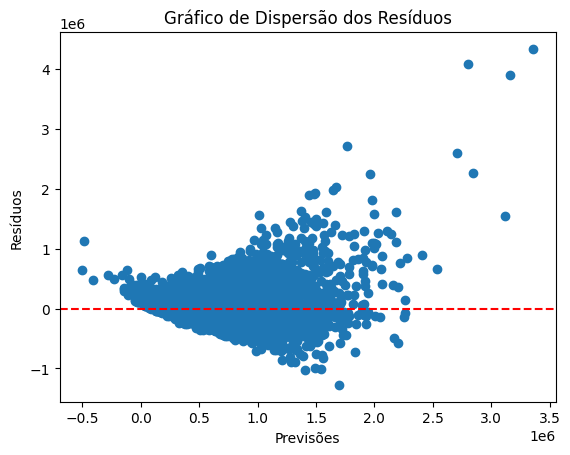

In [ ]:
# cria um gráfico de dispersão dos resíduos em relação às previsões
y_pred = model_sm.predict(X_train)
residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Dispersão dos Resíduos')
plt.show()

In [ ]:
# executa o teste de normalidade de Shapiro-Wilk nos resíduos
from scipy.stats import shapiro
_, p_value = shapiro(residuals)

# verifica o valor-p para determinar se os resíduos seguem uma distribuição normal
if p_value > 0.05:
    print('Os resíduos seguem uma distribuição normal.')
else:
    print('Os resíduos não seguem uma distribuição normal.')

Os resíduos não seguem uma distribuição normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### d) Corrigir os problemas relacionados aos pressupostos da regressão e gerar o modelo mais ajustado para os dados. (20%)

Se os resíduos não seguem uma distribuição normal e violam os pressupostos da regressão linear, existem várias abordagens para fazer um modelo mais ajustado aos dados. Aqui estão algumas opções:
1. Transformação de variáveis
2. Modelos não lineares
3. Seleção de atributos
4. Remover multicolinearidade

Será escolhido um modelo não linear de Árvore de Decisão para avaliar seu desempenho comparado com o modelo de Regressão Linear

In [ ]:
# usa um modelo de árvore de decisão
from sklearn.tree import DecisionTreeRegressor

# cria e ajusta o modelo de árvore de decisão
model2_dt = DecisionTreeRegressor(random_state=42)
model2_dt.fit(X_train, y_train)

# avalia o desempenho do modelo
y_pred = model2_dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²):', r2)

Mean Squared Error (MSE): 40853988539.758736
Root Mean Squared Error (RMSE): 202123.69613619958
R-squared (R²): 0.7297600408828456


### **e) Interpretar os resultados e destacar as principais decisões que podem ser tomadas com base nos resultados encontrados. (10%)**

Podemos verificar que o modelo não linear de Árvore de Decisão teve desempenho melhor comparado com as métricas Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²) do modelo de Regressão Linear, porém ao utilizar a árvore de decisão, é importante considerar que ela pode ser mais suscetível ao overfitting, ou seja, ao ajuste excessivo aos dados de treinamento. Assim, é necessário ajustar os hiperparâmetros do modelo para controlar a profundidade da árvore e outros aspectos do modelo, a fim de encontrar um equilíbrio entre viés e variância.


## **Questão 2 – (4 pontos)**

A questão 2 será baseada na aplicação prática de um problema de Ciência de Dados em Aprendizado de Máquina (Machine Learning). Esses problemas são originados de dados reais aplicados em problemas de Negócios. A questão abordará a aplicação do problema de Reservas de Hotel. O objetivo desse problema é encontrar um modelo capaz de prever se os indivíduos irão cancelar ou não suas reservas em uma rede de hotéis. Com base nos dados fornecidos, solicita-se:

a) Elaborar uma análise descritiva da base de dados, incluindo análise gráfica e tabelas. (10%)

b) Realizar a previsão por meio de um modelo de Regressão Logística. (60%)

c) Identificar as características mais importantes para o cancelamento das reservas e interpretar os resultados. (20%)

d) Explicar o motivo do uso da regressão logística em vez da regressão linear. (10%)

In [ ]:
# baixando o dataset do Kaggle
# {"username":"matheusltr","key":"e4c5cddd081452edd92831397f77e91e"}
od.download("https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: matheusltr
Your Kaggle Key: ··········


100%|██████████| 1.25M/1.25M [00:00<00:00, 39.2MB/s]

### **a) Elaborar uma análise descritiva da base de dados, incluindo análise gráfica e tabelas. (10%)**

É necessário importar o conjunto de dados. Em seguida, podemos realizar uma análise exploratória dos dados, incluindo estatísticas descritivas e visualizações gráficas.

In [ ]:
# visualiza as primeiras linhas do dataframe
df2 = pd.read_csv('/content/hotel-booking-demand/hotel_bookings.csv')
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# obtêm estatísticas descritivas
print(df2.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [ ]:
# verifica informações sobre as colunas e os tipos de dados
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# verifica valores nulos
df2.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# verifica quantidade de valores únicos
df2.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
# remove colunas que não irão contribuir para o modelo
df2 = df2.drop(["agent", "company"], axis = 1)

In [ ]:
# trata valores nulos ou faltantes
df2['country'] = df2['country'].fillna('missing')
df2['children'] = df2['children'].fillna(df2['children'].mode()[0])

In [ ]:
# verifica se todos valores nulos ou faltantes foram tratados
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

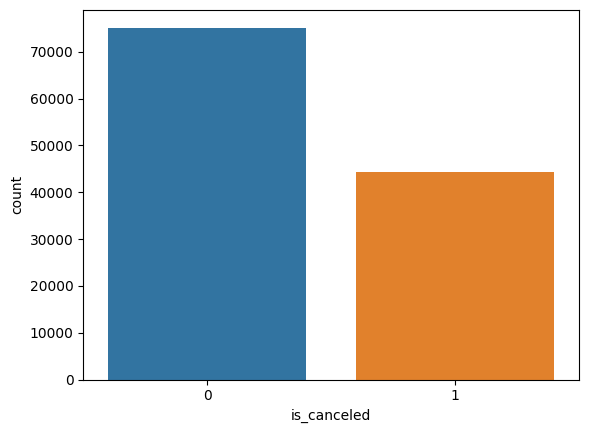

In [ ]:
# visualiza a distribuição da variável alvo
sns.countplot(x='is_canceled', data=df2)
plt.show()

### **b) Realizar a previsão por meio de um modelo de Regressão Logística. (60%)**

Precisamos preparar os dados, dividindo-os em conjuntos de treinamento e teste, realizar o ajuste do modelo e avaliar seu desempenho.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pd.set_option('display.max_columns', 50)
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df2.shape

(119390, 30)

In [ ]:
# aplica one-hot-enconding nas variáveis categóricas
df2 = pd.get_dummies(df2, columns=['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                                   'reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type', 'reservation_status', 'reservation_status_date'])

df2.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,...,reservation_status_date_2017-08-19,reservation_status_date_2017-08-20,reservation_status_date_2017-08-21,reservation_status_date_2017-08-22,reservation_status_date_2017-08-23,reservation_status_date_2017-08-24,reservation_status_date_2017-08-25,reservation_status_date_2017-08-26,reservation_status_date_2017-08-27,reservation_status_date_2017-08-28,reservation_status_date_2017-08-29,reservation_status_date_2017-08-30,reservation_status_date_2017-08-31,reservation_status_date_2017-09-01,reservation_status_date_2017-09-02,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.shape

(119390, 1186)

In [ ]:
# separa as variáveis independentes e dependente
X = df2.drop('is_canceled', axis=1)
y = df2['is_canceled']

In [ ]:
# divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# inicializa e ajusta o modelo de Regressão Logística
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# previsões no conjunto de teste
y_pred = model2.predict(X_test)

In [ ]:
# avalia o desempenho do modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14849    58]
 [  148  8823]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14907
           1       0.99      0.98      0.99      8971

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878



### **c) Identificar as características mais importantes para o cancelamento das reservas e interpretar os resultados. (20%)**

Podemos examinar os coeficientes atribuídos a cada variável explicativa para identificar as características mais importantes para o cancelamento das reservas. Isso pode ser feito usando o atributo coef_ do modelo treinado.

In [ ]:
# identifica características mais importantes
importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(model2.coef_[0])})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)

                                Feature  Importance
257        reservation_status_Check-Out    7.120848
256         reservation_status_Canceled    6.870502
16            total_of_special_requests    2.707993
171                         country_PRT    2.508378
250             deposit_type_Non Refund    1.957354
..                                  ...         ...
284  reservation_status_date_2015-02-27    0.000000
316  reservation_status_date_2015-04-17    0.000000
308  reservation_status_date_2015-04-07    0.000000
247                assigned_room_type_L    0.000000
268  reservation_status_date_2015-01-29    0.000000

[1185 rows x 2 columns]


### **d) Explicar o motivo do uso da regressão logística em vez da regressão linear. (10%)**

A Regressão Logística é uma técnica de aprendizado de máquina adequada para problemas de classificação binária, onde você deseja prever se uma determinada instância pertence a uma classe ou outra. Nesse caso, desejamos prever se os indivíduos irão cancelar ou não suas reservas de hotel. A Regressão Logística é uma escolha comum para esse tipo de problema, pois fornece a probabilidade de pertencer a cada classe, além de permitir a interpretação dos coeficientes das variáveis explicativas. A regressão linear é usada para problemas de regressão, onde a variável de destino é contínua e visa prever um valor numérico.

## **Questão 3 – (2 pontos)**

A questão 3 será baseada na aplicação prática de um problema de ANOVA. Esses problemas são originados de dados reais aplicados em problemas de Negócios. A questão abordará a aplicação do problema de Vendas de Varejo online. O objetivo desse problema é analisar as médias de quantidades e preços dos produtos agrupados por países. Com base nos dados fornecidos, solicita-se:

a) Elaborar uma análise descritiva da base de dados, incluindo análise gráfica e tabelas. (10%)

b) Realizar a comparação entre a quantidade e o preço agrupados por países utilizando ANOVA. (40%)

c) Corrigir os problemas relacionados aos pressupostos da ANOVA e gerar o modelo mais ajustado para os dados. (40%)

d) Interpretar os resultados e destacar as principais decisões que podem ser tomadas com base nos resultados encontrados. (10%)

In [ ]:
# baixando o dataset do Kaggle
# {"username":"matheusltr","key":"e4c5cddd081452edd92831397f77e91e"}
od.download("https://www.kaggle.com/datasets/mathchi/online-retail-ii-data-set-from-ml-repository?select=online_retail_II.xlsx")

Skipping, found downloaded files in "./online-retail-ii-data-set-from-ml-repository" (use force=True to force download)


In [ ]:
df3 = pd.read_excel('/content/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx')

### **a) Elaborar uma análise descritiva da base de dados, incluindo análise gráfica e tabelas. (10%)**

Obtemos uma visão geral dos dados, incluindo medidas de resumo estatístico, como média, mediana, desvio padrão, mínimo e máximo. Além disso, podemos criar gráficos para visualizar a distribuição das quantidades e preços dos produtos, bem como explorar a quantidade de vendas por país.

In [ ]:
# visualiza as primeiras linhas do dataframe
df3.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# obtêm estatísticas descritivas
print(df3.describe())

            Quantity          Price    Customer ID
count  525461.000000  525461.000000  417534.000000
mean       10.337667       4.688834   15360.645478
std       107.424110     146.126914    1680.811316
min     -9600.000000  -53594.360000   12346.000000
25%         1.000000       1.250000   13983.000000
50%         3.000000       2.100000   15311.000000
75%        10.000000       4.210000   16799.000000
max     19152.000000   25111.090000   18287.000000


In [ ]:
# verifica informações sobre as colunas e os tipos de dados
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [ ]:
# verifica valores nulos
df3.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [ ]:
# verifica quantidade de valores únicos
df3.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

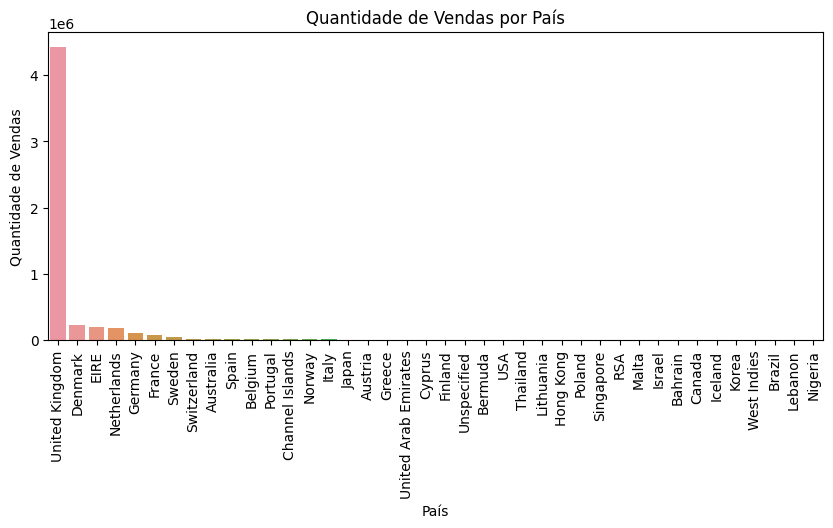

In [ ]:
# gráfico de quantidade de vendas por país
plt.figure(figsize=(10, 4))
sales_by_country = df3.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_country.index, y=sales_by_country.values)
plt.title('Quantidade de Vendas por País')
plt.xlabel('País')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=90)
plt.show()

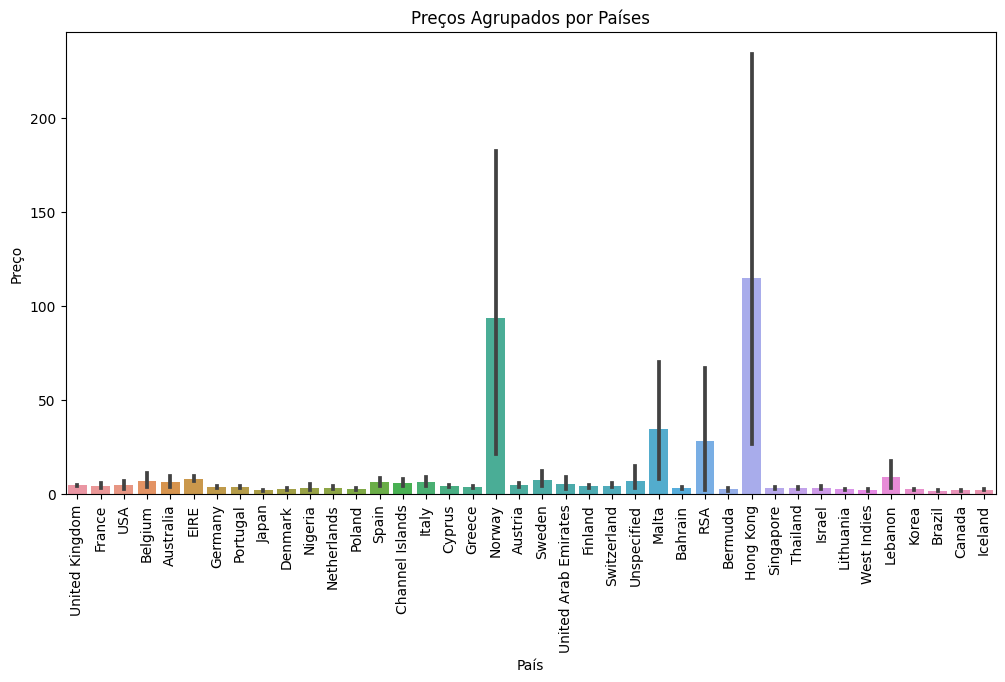

In [ ]:
# gráfico de preços agrupados por países
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Price', data=df3)
plt.title('Preços Agrupados por Países')
plt.xlabel('País')
plt.ylabel('Preço')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# agrupamento da quantidade por país
grouped_quantity = df3.groupby('Country')['Quantity'].mean()
print(grouped_quantity)

Country
Australia                30.662080
Austria                  12.065177
Bahrain                   9.485981
Belgium                  11.366224
Bermuda                  82.294118
Brazil                    3.048387
Canada                   11.610390
Channel Islands          12.134658
Cyprus                    7.889892
Denmark                 530.443925
EIRE                     19.514374
Finland                  10.313559
France                   12.902114
Germany                  13.179112
Greece                   11.897485
Hong Kong                30.342105
Iceland                  11.661972
Israel                   15.297297
Italy                    10.000000
Japan                    29.482143
Korea                     9.492063
Lebanon                   5.461538
Lithuania                14.974026
Malta                     8.994186
Netherlands              65.663778
Nigeria                   1.750000
Norway                   21.308943
Poland                   10.262887
Portugal    

In [ ]:
# agrupamento dos preços por país
grouped_price = df3.groupby('Country')['Price'].mean()
print(grouped_price)

Country
Australia                 6.202324
Austria                   4.623464
Bahrain                   3.298318
Belgium                   6.856499
Bermuda                   2.491176
Brazil                    1.834032
Canada                    1.915714
Channel Islands           5.870033
Cyprus                    4.357184
Denmark                   2.642383
EIRE                      7.948114
Finland                   4.089718
France                    4.189418
Germany                   3.677999
Greece                    3.650754
Hong Kong               114.676053
Iceland                   2.295070
Israel                    3.303108
Italy                     6.292845
Japan                     1.981027
Korea                     2.384762
Lebanon                   8.936154
Lithuania                 2.564740
Malta                    34.358023
Netherlands               3.311910
Nigeria                   3.415000
Norway                   93.769241
Poland                    2.669845
Portugal    

### **b) Realizar a comparação entre a quantidade e o preço agrupados por países utilizando ANOVA. (40%)**

Para realizar a comparação entre a quantidade e o preço agrupados por países, podemos utilizar a análise de variância (ANOVA). Isso nos permitirá determinar se há diferenças estatisticamente significativas nas médias das quantidades e preços entre os países.

In [ ]:
# ANOVA para quantidade
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_quantity = ols('Quantity ~ C(Country)', data=df3).fit()
anova_quantity = sm.stats.anova_lm(model_quantity, typ=2)
print(anova_quantity)

                  sum_sq        df           F  PR(>F)
C(Country)  1.287156e+08      39.0  292.178967     0.0
Residual    5.935061e+09  525421.0         NaN     NaN


In [ ]:
# ANOVA para preço
model_price = ols('Price ~ C(Country)', data=df3).fit()
anova_price = sm.stats.anova_lm(model_price, typ=2)
print(anova_price)

                  sum_sq        df         F        PR(>F)
C(Country)  4.219819e+06      39.0  5.068738  4.282814e-23
Residual    1.121597e+10  525421.0       NaN           NaN


A tabela ANOVA resultante fornece informações importantes sobre a comparação entre os países em relação às variáveis dependentes (quantidade e preço).

* sum_sq (Sum of Squares): Representa a soma dos quadrados da variação explicada por cada fonte de variação. Quanto maior o valor, maior a diferença entre os grupos.

* df (Degrees of Freedom): Representa os graus de liberdade, que correspondem ao número de categorias menos 1. No caso de países, o número de categorias é o número de países menos 1. Quanto maior o número de graus de liberdade, mais precisos são os resultados.

* F (F-value): É o F-value da estatística, que é calculado como a razão entre a variância entre grupos e a variância dentro dos grupos. É usado para testar a hipótese nula de que não há diferença significativa entre as médias dos grupos. Quanto maior o valor F, maior a evidência a favor da hipótese alternativa de que pelo menos um grupo difere dos outros.

* PR(>F) (p-value): É o valor p associado ao teste F. Indica a probabilidade de obter um valor F igual ou mais extremo do que o observado, assumindo que a hipótese nula é verdadeira. Um valor p baixo (geralmente menor que 0,05) indica evidência estatística de diferença significativa entre os grupos.

### **c) Corrigir os problemas relacionados aos pressupostos da ANOVA e gerar o modelo mais ajustado para os dados. (40%)**

A ANOVA possui certos pressupostos que precisam ser atendidos, como normalidade dos resíduos e homogeneidade das variâncias. Se esses pressupostos não forem atendidos, podem ser necessárias transformações nos dados ou o uso de métodos alternativos. Vamos analisar esses pressupostos e, se necessário, aplicar as correções apropriadas para obter um modelo mais ajustado.

Podemos realizar testes de normalidade, como o teste de Shapiro-Wilk, e testes de homogeneidade das variâncias, como o teste de Levene.

In [ ]:
# teste de normalidade dos resíduos para quantidade
from scipy.stats import shapiro, levene

residuals_quantity = model_quantity.resid
shapiro_test_quantity = shapiro(residuals_quantity)
print('Shapiro-Wilk test (Quantity):', shapiro_test_quantity)

# teste de normalidade dos resíduos para preço
residuals_price = model_price.resid
shapiro_test_price = shapiro(residuals_price)
print('Shapiro-Wilk test (Price):', shapiro_test_price)

Shapiro-Wilk test (Quantity): ShapiroResult(statistic=0.05646371841430664, pvalue=0.0)
Shapiro-Wilk test (Price): ShapiroResult(statistic=0.005006849765777588, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# teste de Levene para verificar a homogeneidade das variâncias
grouped_data = df3.groupby('Country')
groups = [grouped_data.get_group(x)['Quantity'] for x in grouped_data.groups]
statistic, p_value = levene(*groups)

# resultados do teste de Levene
print("Estatística de Levene:", statistic)
print("Valor p:", p_value)

Estatística de Levene: 299.4524667414803
Valor p: 0.0


O teste de Levene compara a variabilidade das amostras entre os grupos e testa a hipótese nula de que as variâncias são iguais. Um valor p alto (geralmente maior que 0,05) indica que a hipótese nula não pode ser rejeitada, sugerindo homogeneidade das variâncias.

A interpretação dos resultados envolve a análise dos valores de F e p. Um valor de p baixo (geralmente < 0,05) indica que há diferenças significativas entre os grupos. Portanto, se o valor de p for menor que o nível de significância desejado (geralmente 0,05), podemos rejeitar a hipótese nula de que não há diferenças entre os grupos.

Com base nos resultados do teste de Levene para a homogeneidade das variâncias, temos uma estatística de Levene de 299.452 e um valor p de 0.0. Isso indica que as variâncias entre os grupos não são homogêneas.

Dado a violação do pressuposto da homogeneidade das variâncias, podemos considerar as seguintes opções de ajuste:

1. Transformação dos dados: Algumas transformações comuns incluem a transformação logarítmica ou a raiz quadrada. Você pode experimentar diferentes transformações e, em seguida, realizar novamente o teste de Levene para verificar se a homogeneidade das variâncias é alcançada.

2. Utilização de testes robustos: Se a transformação dos dados não resolver o problema, você pode considerar o uso de testes robustos ou alternativas à ANOVA tradicional que não dependem do pressuposto da homogeneidade das variâncias. Por exemplo, a ANOVA de Welch (ou teste t de Welch) é um método robusto que pode ser usado quando as variâncias não são homogêneas.

3. Análise separada por grupos: Se as diferenças nas variâncias forem muito grandes, pode ser necessário realizar análises separadas para cada grupo, tratando cada grupo como uma unidade separada.

4. Explorar métodos não paramétricos: Se a transformação dos dados e os métodos robustos não forem adequados para ajustar o modelo, você também pode explorar métodos não paramétricos, como o teste de Kruskal-Wallis, que não exigem suposições sobre a distribuição ou homogeneidade das variâncias.

In [ ]:
# realiza a comparação entre quantidade e preço agrupados por países usando ANOVA de Welch
import scipy.stats as stats
welch_result_quantity = stats.f_oneway(*[group['Quantity'] for name, group in df3.groupby('Country')])
welch_result_price = stats.f_oneway(*[group['Price'] for name, group in df3.groupby('Country')])

# exibe os resultados da ANOVA de Welch
print("ANOVA de Welch para Quantidade:")
print("F-value:", welch_result_quantity.statistic)
print("p-value:", welch_result_quantity.pvalue)

print("\nANOVA de Welch para Preço:")
print("F-value:", welch_result_price.statistic)
print("p-value:", welch_result_price.pvalue)

ANOVA de Welch para Quantidade:
F-value: 292.1789672656906
p-value: 0.0

ANOVA de Welch para Preço:
F-value: 5.0687384493560135
p-value: 4.2828136693802134e-23


### **d) Interpretar os resultados e destacar as principais decisões que podem ser tomadas com base nos resultados encontrados. (10%)**


Em resumo, os resultados indicam que tanto as médias das quantidades quanto as médias dos preços dos produtos variam de forma significativa entre os países. Isso significa que há diferenças estatisticamente significativas nas quantidades e nos preços dos produtos vendidos online entre os países analisados.

Essas informações podem ser usadas para tomar decisões estratégicas relacionadas ao varejo online, como ajustar as estratégias de marketing ou preços para cada país específico, identificar os países com maior demanda ou necessidades diferentes, ou adaptar o estoque e a logística de acordo com as particularidades de cada país.